## BBP算法计算圆周率
$ \pi=\sum^{\infty}_{k=0}[\frac{1}{16^k}(\frac{4}{8k+1}-\frac{2}{8k+4}-\frac{1}{8k+5}-\frac{1}{8k+6})]$

In [1]:
import matplotlib.pyplot as plt 
import time
from numba import jit
import numpy as np

#### 法一:使用numba加速
* 使用numba和不使用numba加速对比

In [2]:
@jit
def pi_BBP_numba():
    pi=0
    for k in range(0,15):
        pi+=1/pow(16,k)*(4/(8*k+1)-2/(8*k+4)-1/(8*k+5)-1/(8*k+6))
    return pi
pi_BBP_numba()

3.141592653589793

#### 法二、使用Cython加速

In [3]:
%load_ext Cython

In [4]:
%%cython
def pi_BBP_cython():
    pi=0
    for k in range(0,15):
        pi+=1/pow(16,k)*(4/(8*k+1)-2/(8*k+4)-1/(8*k+5)-1/(8*k+6))
    return pi
pi_BBP_cython()

#### 方法速度对比

In [8]:
def pi_BBP():
    pi=0
    for k in range(0,15):
        pi+=1/pow(16,k)*(4/(8*k+1)-2/(8*k+4)-1/(8*k+5)-1/(8*k+6))
    return pi
pi_BBP()

3.141592653589793

In [6]:
start=time.perf_counter() 
for i in range(100):
    pi=pi_BBP_numba()
print("pi=",pi)
end=time.perf_counter() 
running_time=end-start
print("使用numba加速的程序执行100次的时间为：%.20f" %running_time)

start=time.perf_counter() 
for i in range(100):
    pi=pi_BBP_cython()
print("pi=",pi)
end=time.perf_counter() 
running_time=end-start
print("使用cython加速的程序执行100次的时间为：%.20f" %running_time)

start=time.perf_counter() 
for i in range(100):
    pi=pi_BBP()
print("pi=",pi)
end=time.perf_counter() 
running_time=end-start
print("未使用加速的程序执行100次的时间为：%.20f" %running_time)

pi= 3.141592653589793
使用numba加速的程序执行100次的时间为：0.00028689999999897964
pi= 3.141592653589793
使用cython加速的程序执行100次的时间为：0.00064020000000652999
pi= 3.141592653589793
未使用加速的程序执行100次的时间为：0.00107580000000240261


#### 绘图展示pi的计算过程

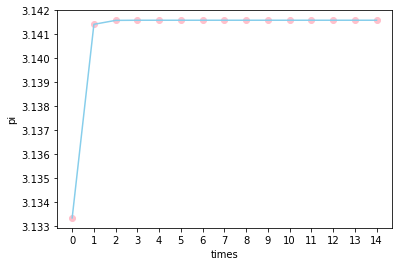

In [7]:
y=[i for i in range(0,15)]
pi=0
for k in range(0,15):
    pi+=1/pow(16,k)*(4/(8*k+1)-2/(8*k+4)-1/(8*k+5)-1/(8*k+6))
    y[k]=pi
x=[i for i in range(0,15)]
y_ticks=np.arange(3.130,3.143,0.001)
x_ticks = np.arange(0,15,1)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.plot(x,y,color='skyblue')
plt.scatter(x,y,color='pink')
plt.xlabel('times')
plt.ylabel('pi')
plt.show()